In [3]:
import pandas as pd
import wave
from scipy.signal import butter, filtfilt
import soundfile as sf
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import scipy.io.wavfile as wavfile
import librosa, librosa.display
import noisereduce as nr
from scipy.interpolate import interp1d
from matplotlib import mlab

/Users/rosameliacarioni/miniconda3/envs/bach_thesis_4/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## PLOTS

In [4]:
def joint_plots (origen_file, destination_file):
    # Load audio file and apply FFT
    sample_rate, samples = wavfile.read(origen_file)
    samples = samples - samples.mean()
    fft_values = np.fft.fft(samples)
    fig = plt.figure(figsize=(10, 12))

    # Plot time-domain representation of the audio signal
    ax1 = plt.subplot(311)
    t = np.arange(len(samples)) / float(sample_rate)
    ax1.plot(t, samples)
    #librosa.display.waveshow(samples, sr=sample_rate)
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Amplitude')
    ax1.set_title('Time-domain representation')
    ax1.grid()

    # Plot frequency-domain representation of the audio signal: how much each frequency is contributing to overall sound of audio file
    ax2 = plt.subplot(312)
    ax2.plot(abs(fft_values))
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Magnitude')
    ax2.set_title('Magnitude spectrum plot: Contribution of each frequency')
    ax2.grid()

    # Plot spectrogram of the audio signal
    ax3 = plt.subplot(313)
    wave_object = wave.open(origen_file, 'rb')
    n_samples = wave_object.getnframes()
    sample_freq = wave_object.getframerate()
    t_audio = n_samples/sample_freq
    signal_wave = wave_object.readframes(n_samples)
    signal_array = np.frombuffer(signal_wave, dtype=np.int16)

    # Remove DC offset which is the presence of a non-zero mean value in the audio signal, and it can cause a large spike at 0 Hz in the spectrogram
    signal_array = signal_array - np.mean(signal_array)

    ax3.specgram(signal_array, Fs=sample_freq, vmin=-20, vmax=50)
    ax3.set_title('Spectogram')
    ax3.set_ylabel('Frequency (Hz)')
    ax3.set_xlabel('Time (s)')
    ax3.set_xlim(0, t_audio)

    # Combine all the plots into a single figure
    plt.tight_layout()
    #plt.savefig(destination_file)
    #plt.show()

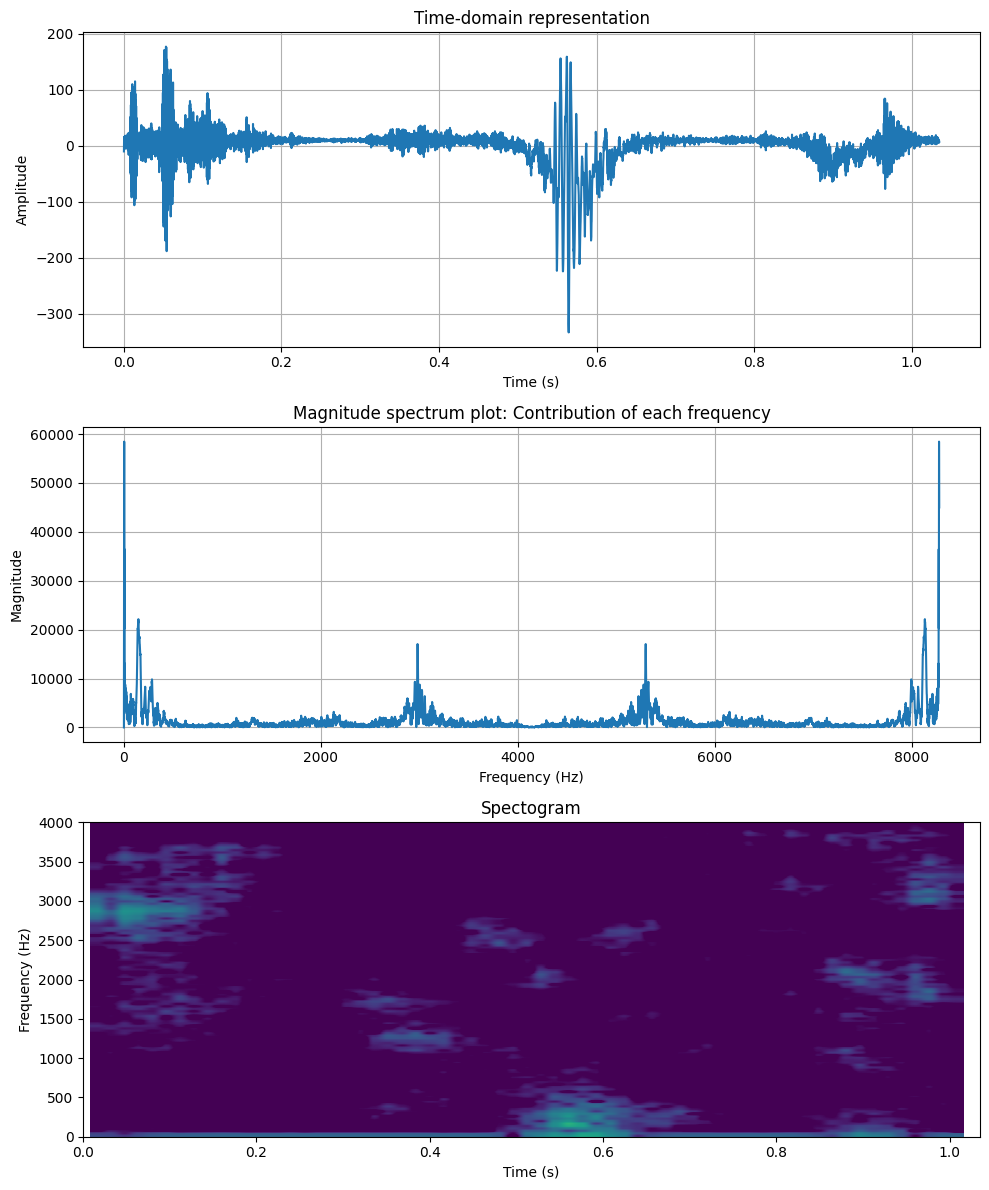

In [9]:
file_name = 'data/Clips/ecoguns1.wav' 
stat= True 
rate, data = wavfile.read(file_name)

# Noise Reduce with all default values 
reduced_noise = nr.reduce_noise(y=data, sr=rate, stationary=stat)
wavfile.write('test.wav', rate, reduced_noise)
joint_plots ('test.wav', 'whatever')


# 1. time_constant_s
### Higher value: smoother representation of the magnitude spectrogram, more conservative threshold for the spectral gating algorithm.
### Lower value: less smooth representation of the magnitude spectrogram, more aggressive threshold for the spectral gating algorithm. The filter would respond more quickly to changes in the input signal, effectively preserving short-term variations in the spectrogram.

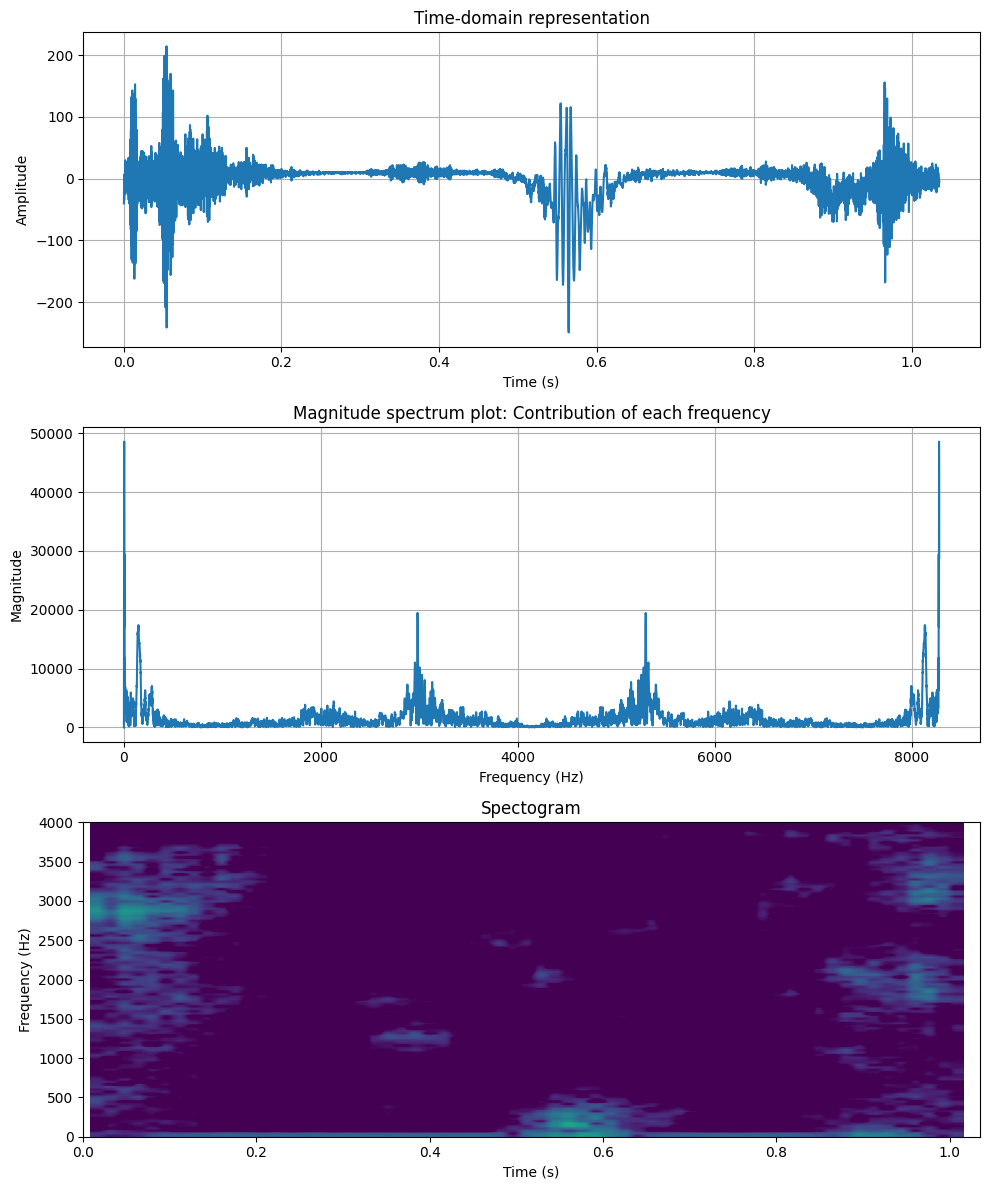

In [14]:
file_name = 'data/Clips/ecoguns1.wav' 
stat= False 
rate, data = wavfile.read(file_name)

# Noise Reduce with all default values 
reduced_noise = nr.reduce_noise(y=data, sr=rate, stationary=stat, time_constant_s= 0.35)
wavfile.write('test.wav', rate, reduced_noise)
joint_plots ('test.wav', 'whatever')


/Users/rosameliacarioni/miniconda3/envs/bach_thesis_4/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


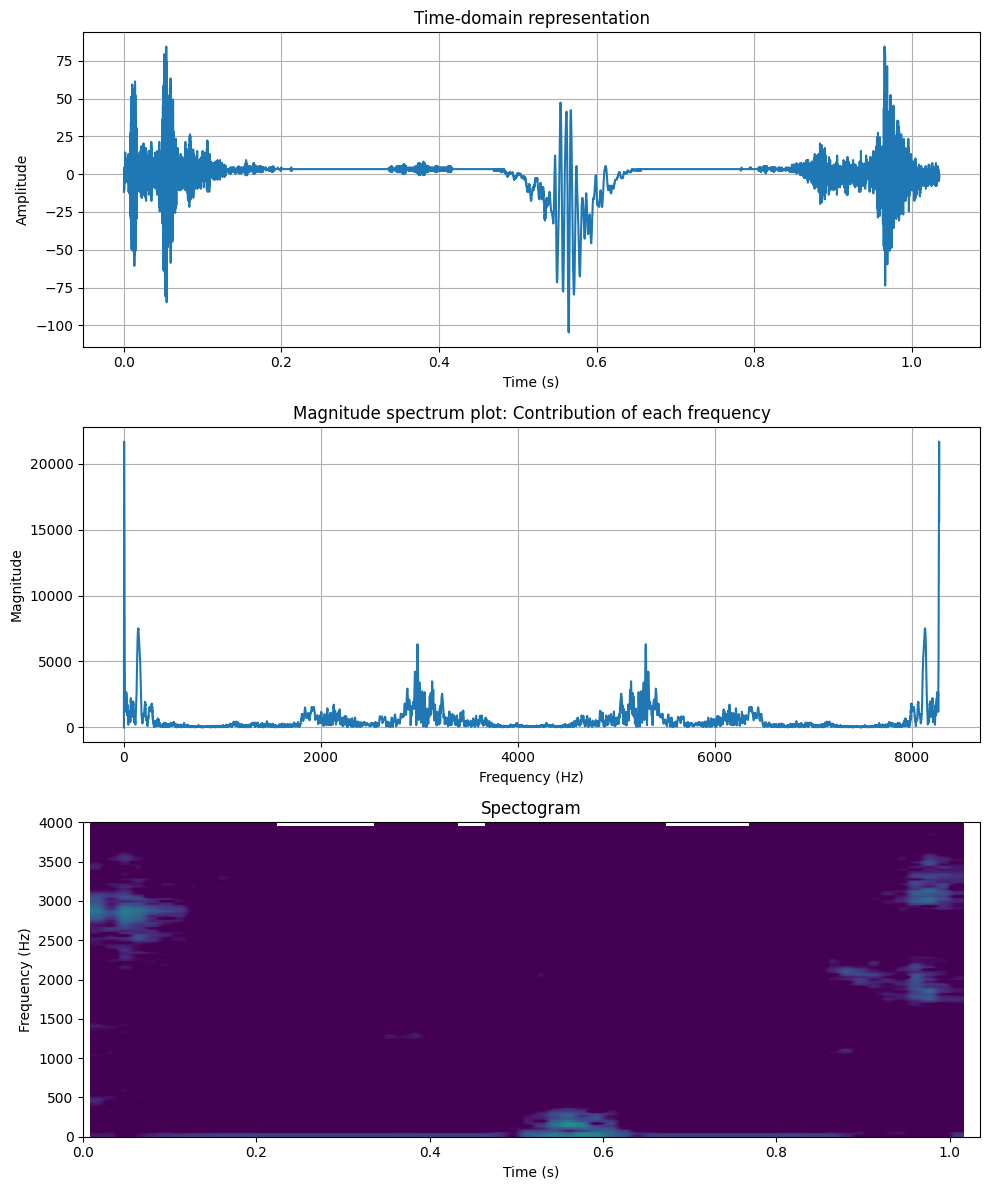

In [21]:
file_name = 'data/Clips/ecoguns1.wav' 
stat= False 
rate, data = wavfile.read(file_name)

# Noise Reduce with all default values 
reduced_noise = nr.reduce_noise(y=data, sr=rate, stationary=stat, time_constant_s= 0.2)
wavfile.write('test.wav', rate, reduced_noise)
joint_plots ('test.wav', 'whatever')


# 2. thresh_n_mult_nonstationary
### larger value = fewer frequency bins will be classified as signal and more will be classified as noise.
Desirable in cases where the signal is relatively strong or when aggressive noise reduction is desired.
### smaller value = more frequency bins will be classified as signal and fewer will be classified as noise. 
Desirable in cases where the signal is relatively weak or when a more conservative approach to noise reduction is desired.

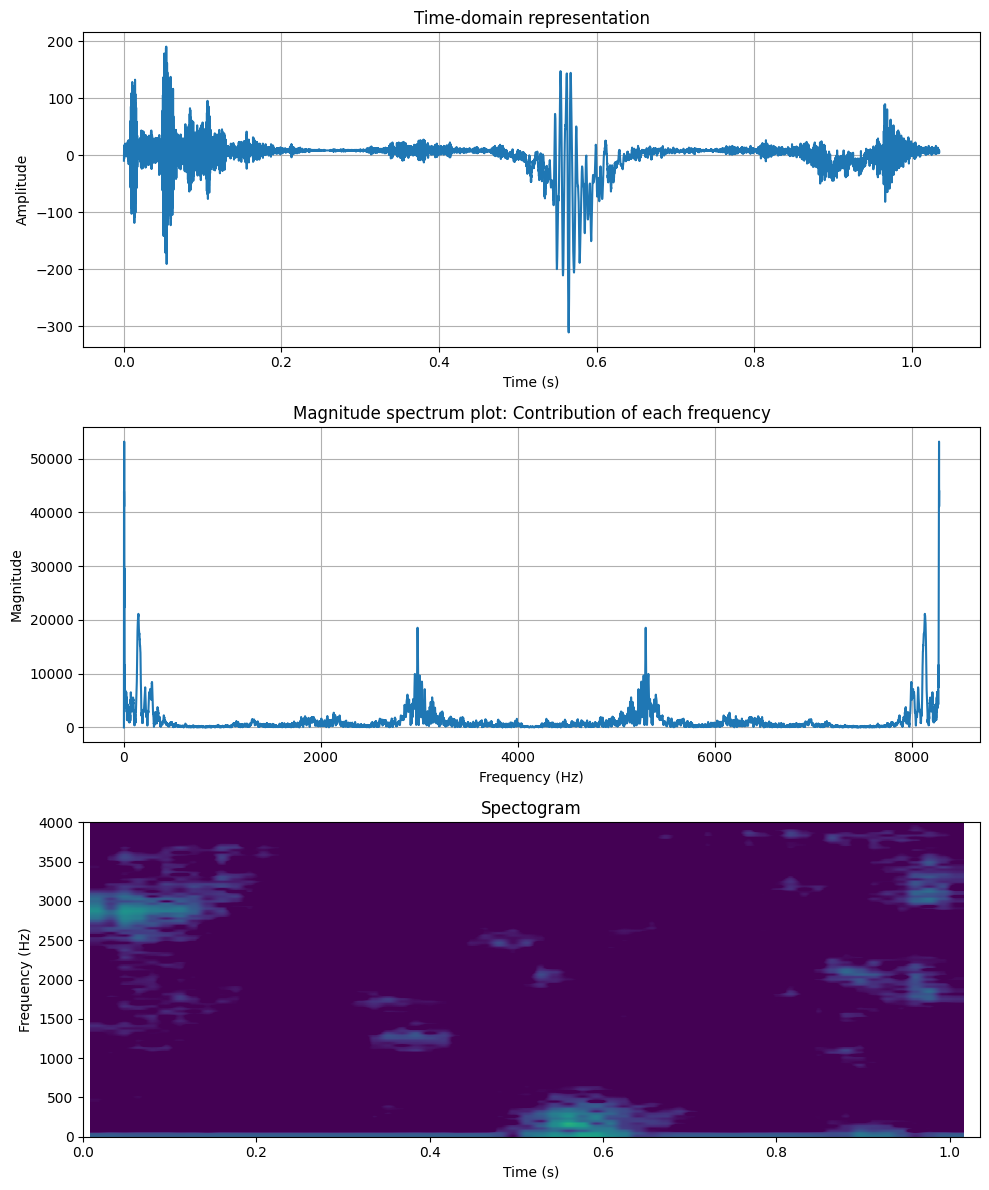

In [32]:
file_name = 'data/Clips/ecoguns1.wav' 
stat= False 
rate, data = wavfile.read(file_name)

# Noise Reduce with all default values 
reduced_noise = nr.reduce_noise(y=data, sr=rate, stationary=stat, thresh_n_mult_nonstationary= 9)
wavfile.write('test.wav', rate, reduced_noise)
joint_plots ('test.wav', 'whatever')

# 3. sigmoid_slope_nonstationary

### A larger value of sigmoid_slope_nonstationary would result in a steeper sigmoid function and a more aggressive masking

### smaller value would result in a more gradual masking 

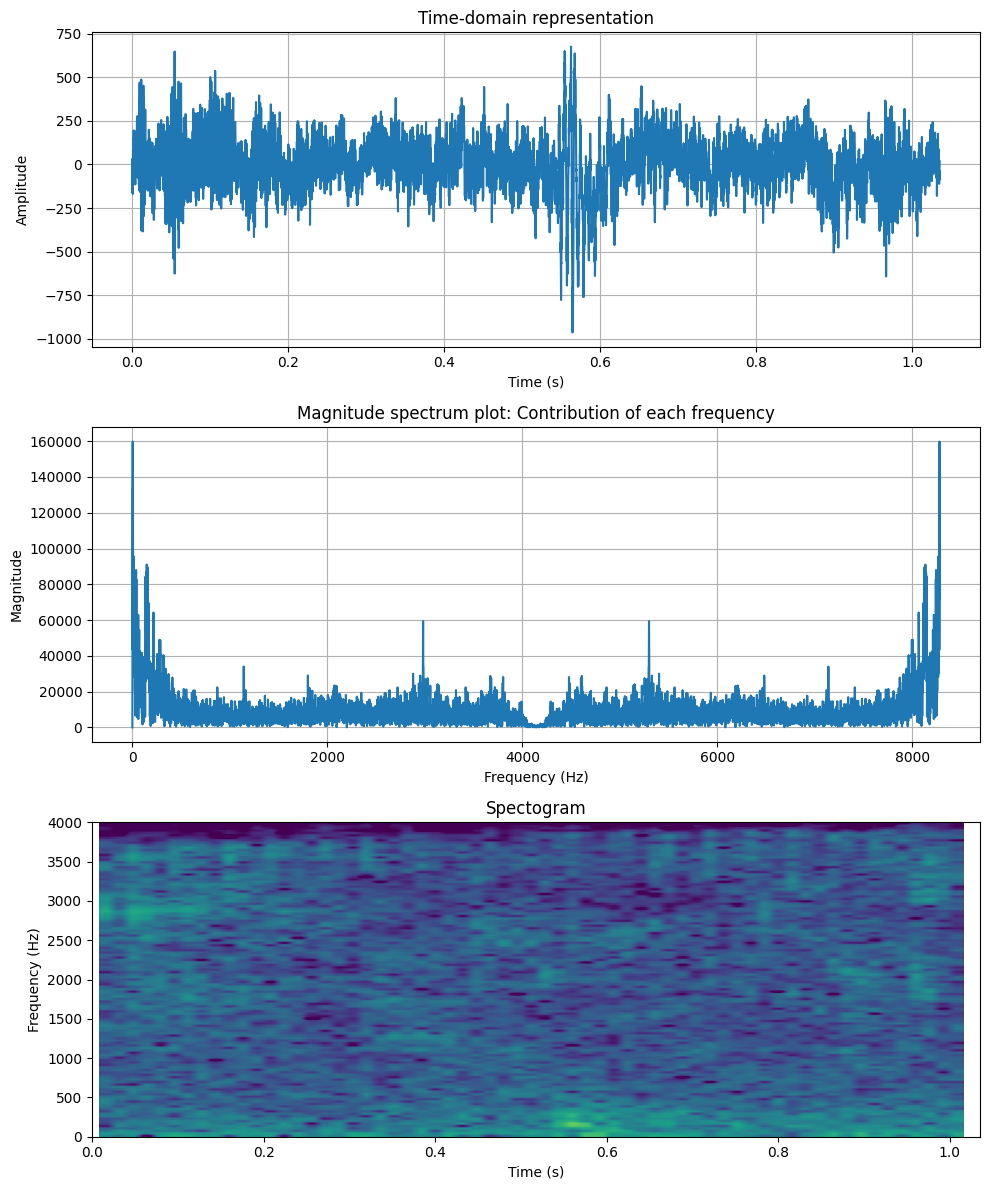

In [38]:
# I couldnt see change by playing with this 

# 4. Chunck_size 
Playing with this value starting at default and going down by :100 , up to 6 did not show any change but just made the prcess slower. 

# 5. n_fft
Changing the value of n_fft can affect the resolution of the frequency content of the input signal and therefore the accuracy of the noise threshold estimation. 

### If n_fft is too small, the noise threshold may be overestimated, resulting in the loss of some signal components. 
 
### On the other hand, if n_fft is too large, the noise threshold may be underestimated, resulting in the introduction of noise into the denoised signal.

## Merged time constant and threshold 

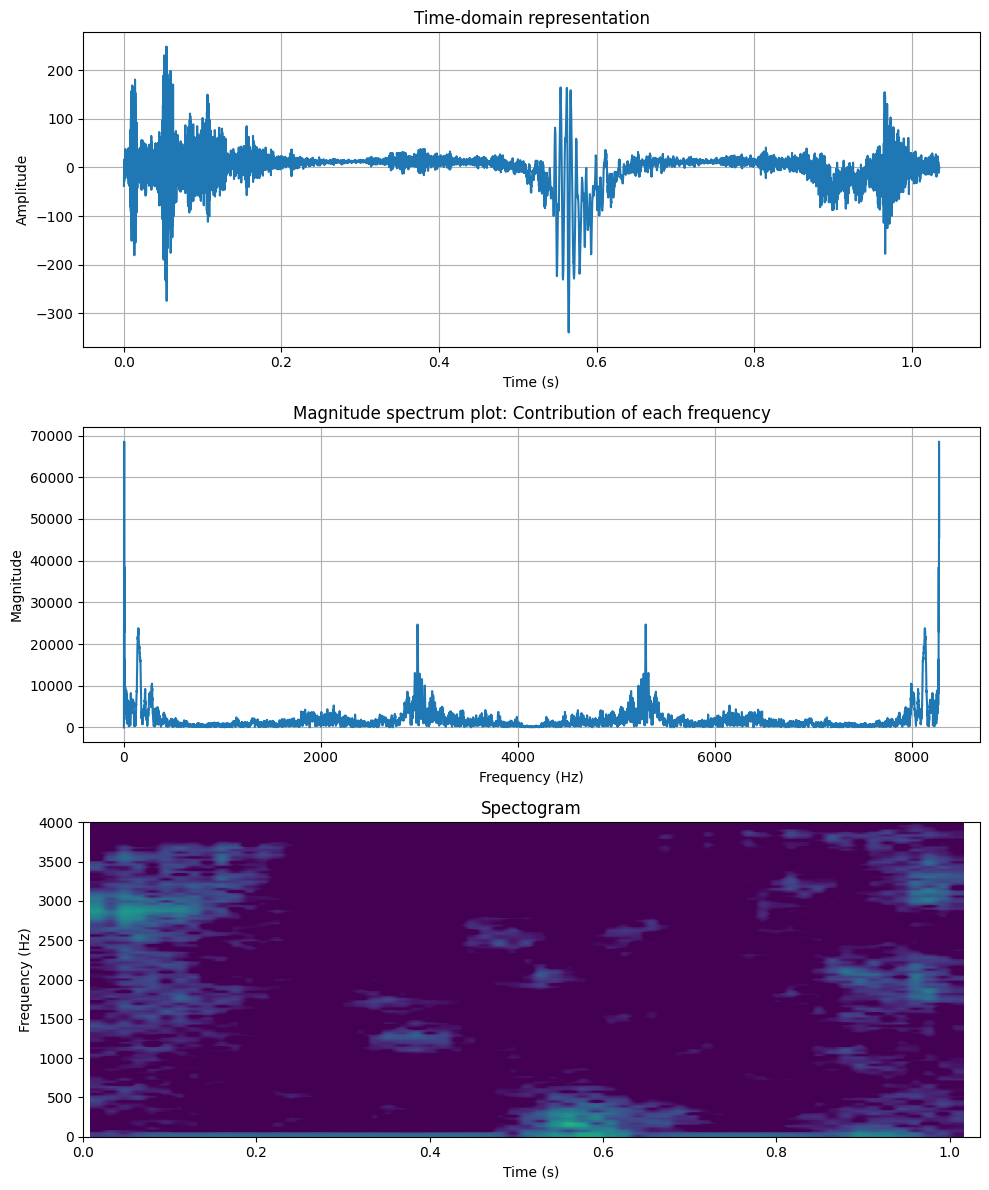

In [115]:
file_name = 'data/Clips/ecoguns1.wav' 
stat= False 
rate, data = wavfile.read(file_name)

# Noise Reduce with all default values 
reduced_noise = nr.reduce_noise(y=data, sr=rate, stationary=stat, time_constant_s= 0.7, thresh_n_mult_nonstationary= 3) 
wavfile.write('test.wav', rate, reduced_noise)
joint_plots ('test.wav', 'whatever')